In [1]:
import functools
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

In [2]:
np.random.seed(123459876)

In [3]:
b0_min, b0_max = -10, +10
b1_min, b1_max = -10, +10

In [4]:
def real_model(t, b0, b1):
    return (t-b0)*(t-b1)
    #return np.sin(6*b0*t) + b1
    #return b1*t + b0

In [5]:
def test_model(t, b0, b1):
    return real_model(t, b0, b1)
    #return np.sqrt(np.abs(b0 - t)) + b1*np.power(t, 3)
    #return np.sin(6*b0*t) + b1
    #return b1*t + b0

In [6]:
pb0 = -1
pb1 = 1
sigma = 0.025
N = 100

In [7]:
t = np.linspace(-2, 2, N)
x = real_model(t, pb0, pb1)
e = np.random.randn(t.size)
xn = x + sigma*e

In [8]:
popt_r, pcov_r = optimize.curve_fit(real_model, t, xn,)# [-7.5, -7.5], maxfev=10000)
popt_t, pcov_t = optimize.curve_fit(test_model, t, xn,)# [-5.0, -5.0], maxfev=10000)

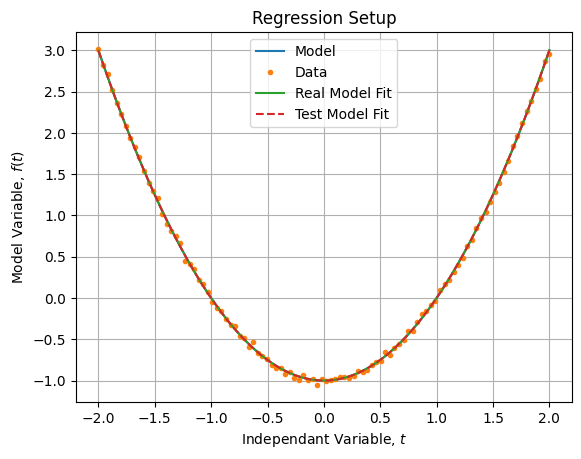

In [9]:
fig, axe = plt.subplots()
axe.plot(t, x, label="Model")
axe.plot(t, xn, linestyle="None", marker=".", label="Data")
axe.plot(t, real_model(t, *popt_r), label="Real Model Fit")
axe.plot(t, test_model(t, *popt_t), linestyle="--", label="Test Model Fit")
axe.set_title("Regression Setup")
axe.set_xlabel("Independant Variable, $t$")
axe.set_ylabel("Model Variable, $f(t)$")
axe.grid()
axe.legend()

In [10]:
b0 = np.linspace(b0_min, b0_max, 300)
b1 = np.linspace(b1_min, b1_max, 300)
B0, B1 = np.meshgrid(b0, b1)

In [11]:
def _objective(f, x, t, b0, b1):
    return np.log(np.sum(np.power(f(t, b0, b1) - x, 2))/t.size)
objective = np.vectorize(_objective, excluded=["f", "t", "x"])

In [12]:
MLE = objective(test_model, t=t, x=xn, b0=B0, b1=B1)

In [13]:
MLE.min(), MLE.max()

(-5.459846585726232, 9.282221383598902)

In [14]:
goal = functools.partial(_objective, test_model, xn, t)

In [15]:
def objective_(beta, f, t, x):
    return np.log(np.sum(np.power(f(t, beta[0], beta[1]) - x, 2)))/t.size

In [16]:
b0_ = np.linspace(-5, 5, 5)
b1_ = np.linspace(-5, 5, 5)
B0_, B1_ = np.meshgrid(b0_, b1_)

In [17]:
B = np.stack([
    B0_.flatten(),
    B1_.flatten(),
]).T

In [18]:
theta = np.linspace(0, 2*np.pi, 64)
B = 10*np.array([np.cos(theta), np.sin(theta)]).T

In [19]:
def callback(pk):
    global trace
    trace.append(pk)
    return False

In [20]:
traces = []
results = []
for params in B:
    trace = [params]
    result = optimize.minimize(objective_, params, args=(test_model, t, xn), method='CG', callback=callback)
    traces.append(np.array(trace))
    results.append(result)

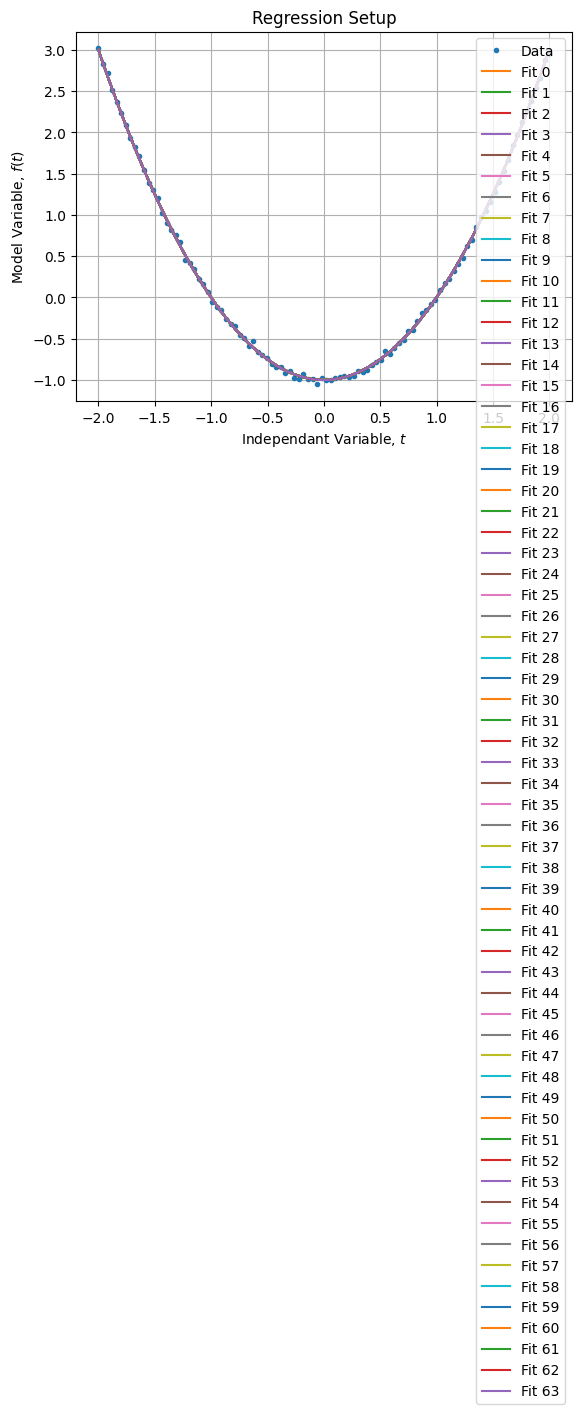

In [21]:
params = [result.x for result in results if result.success]
fig, axe = plt.subplots()
axe.plot(t, xn, linestyle="None", marker=".", label="Data")
for i, p in enumerate(params):
    axe.plot(t, real_model(t, *p), label="Fit %d" % i)
axe.set_title("Regression Setup")
axe.set_xlabel("Independant Variable, $t$")
axe.set_ylabel("Model Variable, $f(t)$")
axe.grid()
axe.legend()

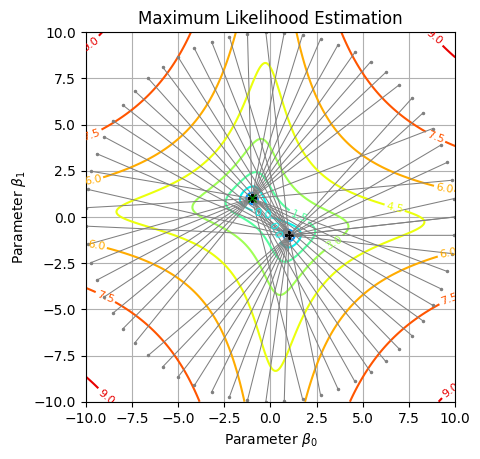

In [22]:
fig, axe = plt.subplots()
c = axe.contour(B0, B1, MLE, 10, cmap="jet")
axe.clabel(c, c.levels, inline=True, fontsize=8)
for result, trace in zip(results, traces):
    axe.plot(*trace.T[:,[0,-1]], linestyle="-", marker=".", color="gray", linewidth=0.75, markersize=3)
    #axe.plot(*trace.T, linestyle="-", color="gray", linewidth=0.75)
    axe.plot(*result.x, marker="+", color="black")
axe.plot(pb0, pb1, marker="x", color="green")
axe.set_title("Maximum Likelihood Estimation")
axe.set_xlabel(r"Parameter $\beta_0$")
axe.set_ylabel(r"Parameter $\beta_1$")
axe.set_xlim([b0_min, b0_max])
axe.set_ylim([b1_min, b1_max])
axe.set_aspect("equal")
axe.grid()

In [23]:
traces[0]

array([[10.        ,  0.        ],
       [ 9.83126333, -0.29282852],
       [ 0.52725292, -0.33449594],
       [ 0.49597644, -0.33776839],
       [ 0.54497882, -0.81675107],
       [ 0.69312585, -1.08250234],
       [ 0.88451898, -1.20108701],
       [ 1.04270114, -1.16404332],
       [ 1.0941764 , -1.08589607],
       [ 1.07217   , -0.9968178 ],
       [ 1.03535252, -0.96453392],
       [ 0.99383239, -0.96698872],
       [ 0.98046592, -0.98384751],
       [ 0.98854338, -1.0062648 ],
       [ 0.9964124 , -1.00920214],
       [ 1.00007676, -1.00249358],
       [ 0.99986216, -1.00087364],
       [ 0.99964524, -1.00086925],
       [ 0.99962458, -1.00086872],
       [ 0.99962417, -1.0008655 ]])

In [24]:
traces[0].T[:,[0,-1]]

array([[10.        ,  0.99962417],
       [ 0.        , -1.0008655 ]])